In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('clustered_data.csv')

print(dataset.shape)

(36733, 13)


In [3]:
dataset.head()

Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0           0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1           1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2           2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3           3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4           4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   

      CDP       CO     NOX  CLUSTER  
0  11.898  0.32663  81.952        1  
1  11.892  0.44784  82.377        1  
2  12.042  0.45144  83.776        1  
3  11.990  0.23107  82.505        1  
4  11.910  0.26747  82.028        1

In [4]:
dataset = dataset.drop(['Unnamed: 0','CO','NOX'],axis=1)
dataset.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

   CLUSTER  
0        1  
1        1  
2        1  
3        1  
4        1

## Check for balanced dataset

<AxesSubplot:xlabel='CLUSTER', ylabel='count'>

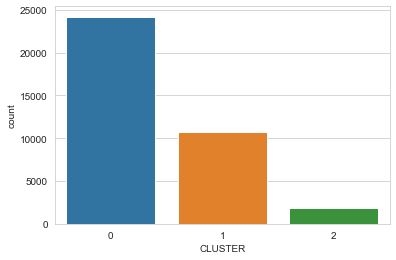

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='CLUSTER',data=dataset)

In [6]:
dataset['CLUSTER'].value_counts()

0    24202
1    10728
2     1803
Name: CLUSTER, dtype: int64

## Missing Values

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AT       36733 non-null  float64
 1   AP       36733 non-null  float64
 2   AH       36733 non-null  float64
 3   AFDP     36733 non-null  float64
 4   GTEP     36733 non-null  float64
 5   TIT      36733 non-null  float64
 6   TAT      36733 non-null  float64
 7   TEY      36733 non-null  float64
 8   CDP      36733 non-null  float64
 9   CLUSTER  36733 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [8]:
dataset.isnull().sum()

AT         0
AP         0
AH         0
AFDP       0
GTEP       0
TIT        0
TAT        0
TEY        0
CDP        0
CLUSTER    0
dtype: int64

## Categorical Features

In [9]:
numerical_features = dataset.columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP',
       'CLUSTER'],
      dtype='object')

In [10]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [11]:
discrete_feature

['CLUSTER']

## Continuous Features

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


In [13]:
continuous_feature

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']

#### Find outliers in continuous feature

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


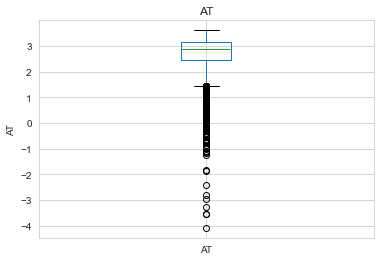

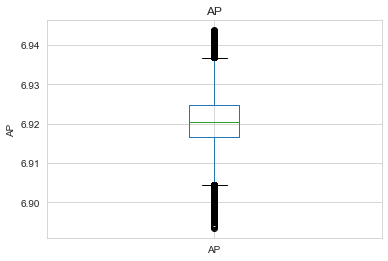

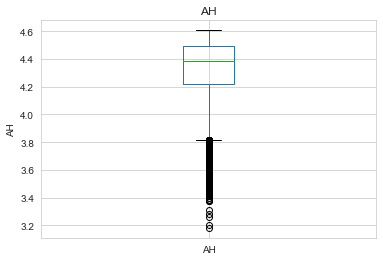

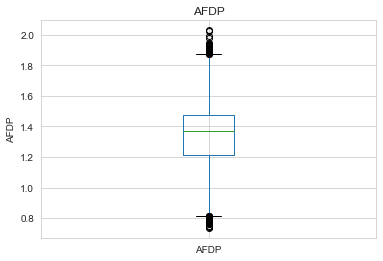

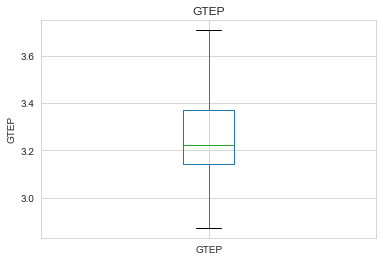

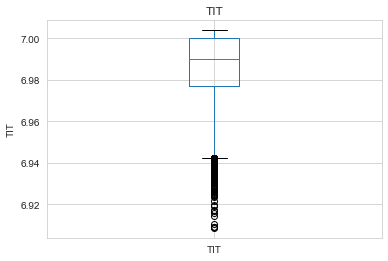

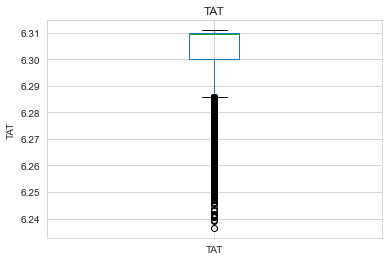

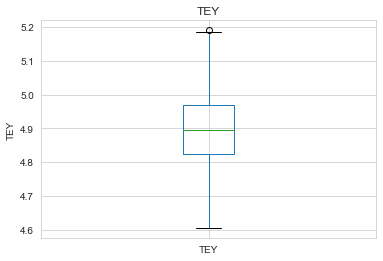

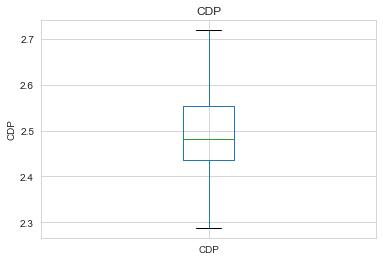

In [23]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Find the corelations

In [15]:
dataset[continuous_feature].corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.406601 -0.476291  0.251974  0.045851  0.183706  0.281869   
AP   -0.406601  1.000000 -0.015184 -0.040363  0.057533 -0.005390 -0.225601   
AH   -0.476291 -0.015184  1.000000 -0.147840 -0.235153 -0.221809  0.022965   
AFDP  0.251974 -0.040363 -0.147840  1.000000  0.678485  0.691292 -0.466882   
GTEP  0.045851  0.057533 -0.235153  0.678485  1.000000  0.874234 -0.699703   
TIT   0.183706 -0.005390 -0.221809  0.691292  0.874234  1.000000 -0.380862   
TAT   0.281869 -0.225601  0.022965 -0.466882 -0.699703 -0.380862  1.000000   
TEY  -0.091152  0.118224 -0.137360  0.665483  0.964127  0.910297 -0.682396   
CDP   0.015287  0.102636 -0.196275  0.702568  0.978470  0.908469 -0.706438   

           TEY       CDP  
AT   -0.091152  0.015287  
AP    0.118224  0.102636  
AH   -0.137360 -0.196275  
AFDP  0.665483  0.702568  
GTEP  0.964127  0.978470  
TIT   0.910297  0.908469  
TAT  -0.682396 -0.706438  
TEY   1.000000  0.988778  
CDP   0.988778  1.000000

<AxesSubplot:>

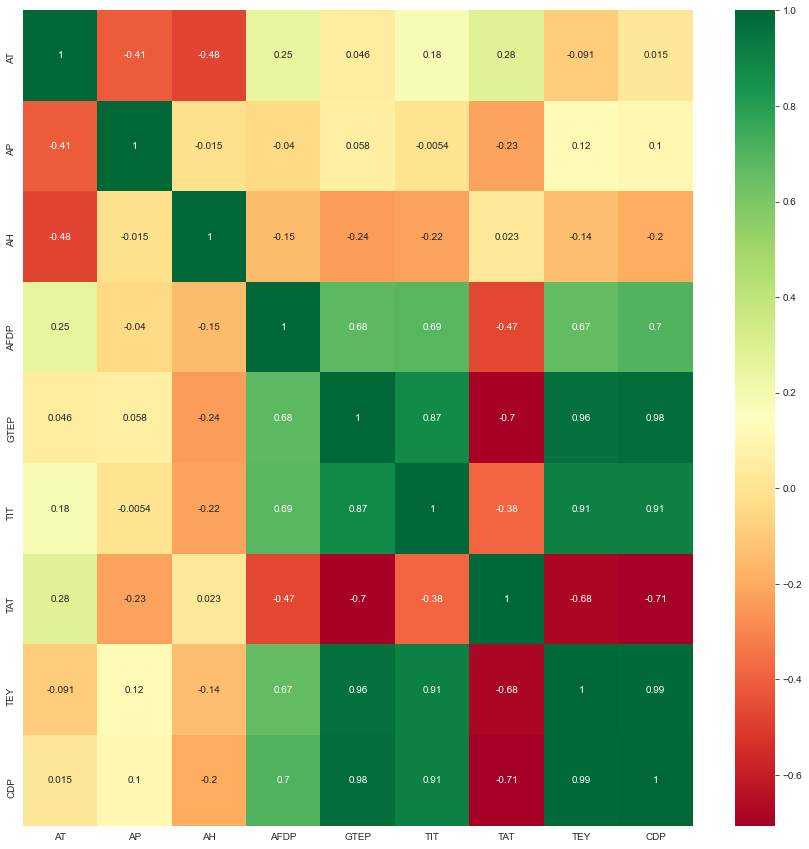

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset[continuous_feature].corr(),annot=True,cmap="RdYlGn")

In [17]:
def plot_scatter(feature1,feature2):
    sns.FacetGrid(dataset,hue="CLUSTER",size=5).map(plt.scatter,feature1,feature2).add_legend();
    plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


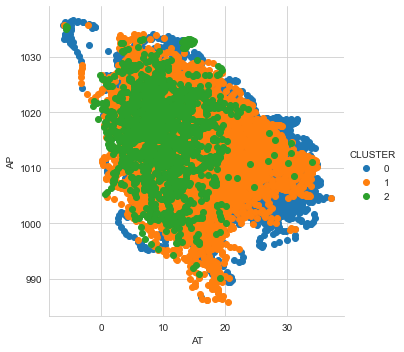

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


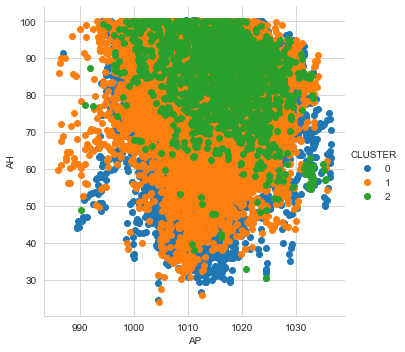

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


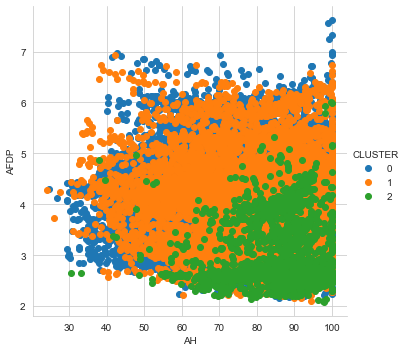

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


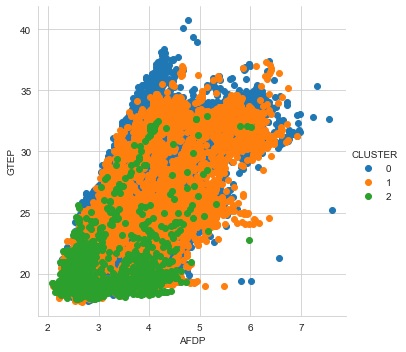

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


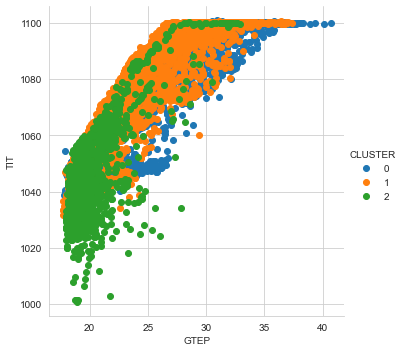

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


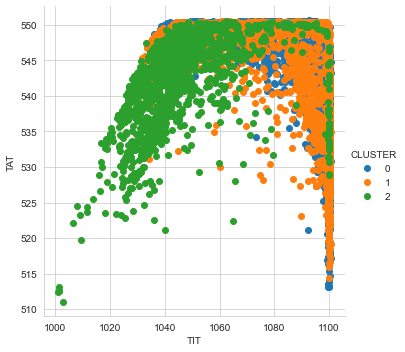

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


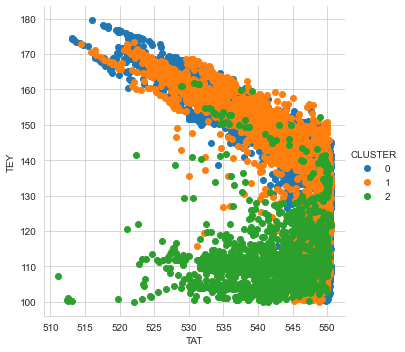

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


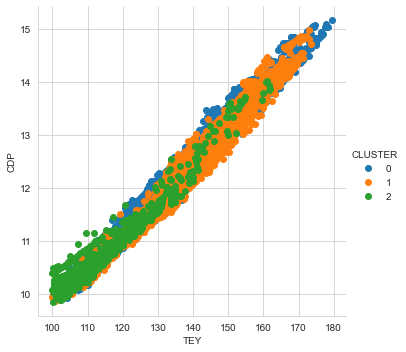

In [18]:
for i in range(len(continuous_feature)-1):
    plot_scatter(continuous_feature[i],continuous_feature[i+1])

In [26]:
def plot_distplot(feature):
    sns.distplot(dataset[feature].dropna(),kde=False,color='darkred',bins=10)
    plt.show()

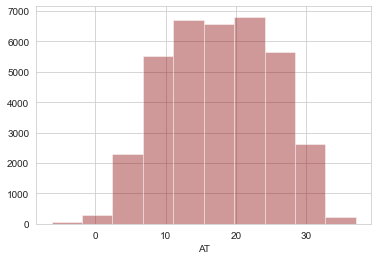

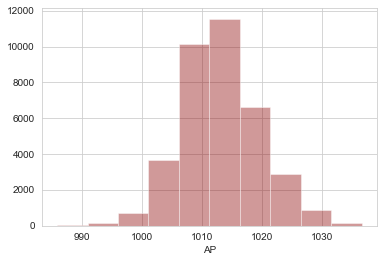

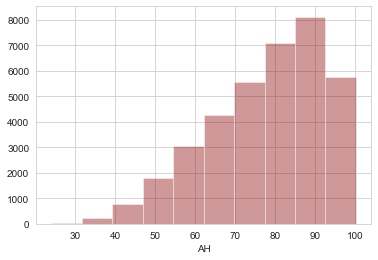

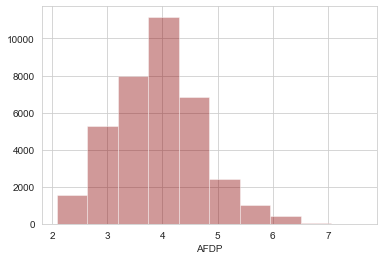

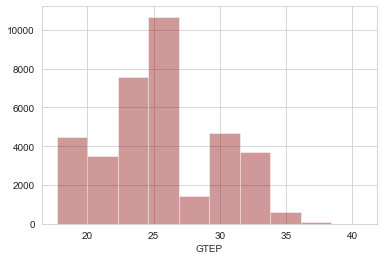

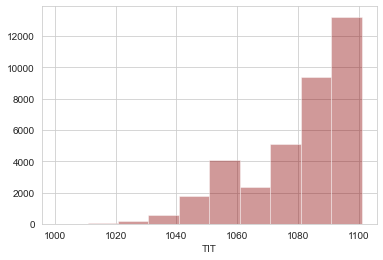

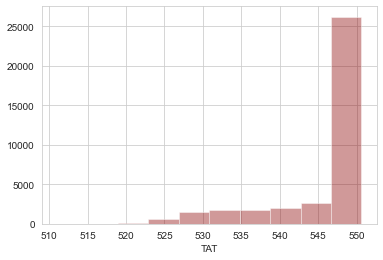

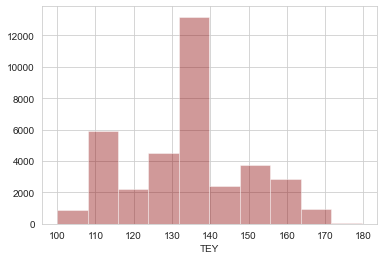

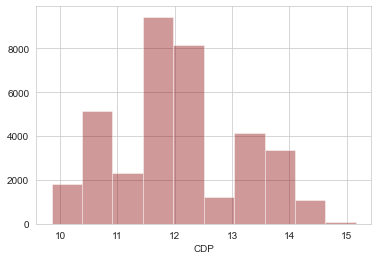

In [27]:
for i in range(len(continuous_feature)):
    plot_distplot(continuous_feature[i])

In [20]:
df1 = dataset.loc[dataset['CLUSTER']==0]
df2 = dataset.loc[dataset['CLUSTER']==1]
df3 = dataset.loc[dataset['CLUSTER']==2]


AT



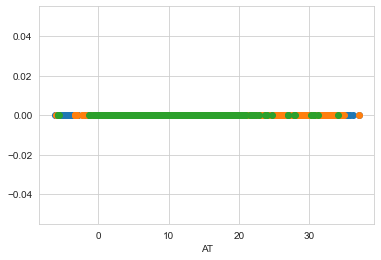


AP



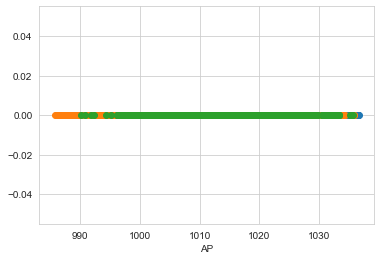


AH



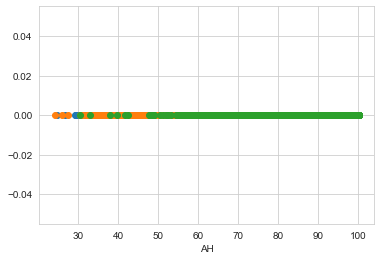


AFDP



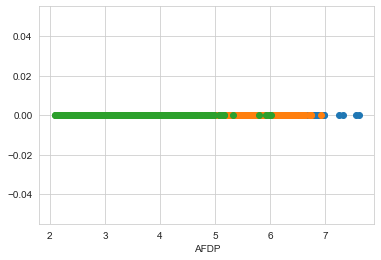


GTEP



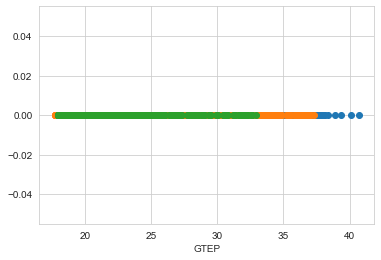


TIT



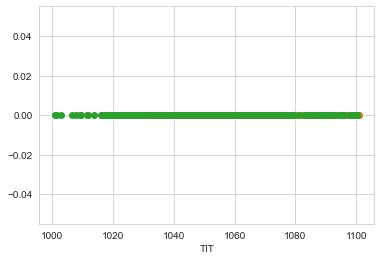


TAT



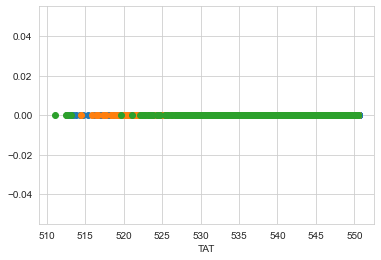


TEY



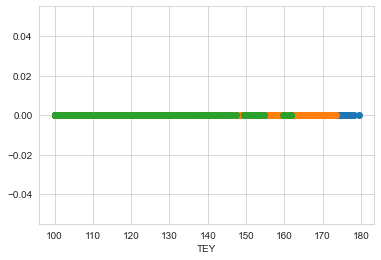


CDP



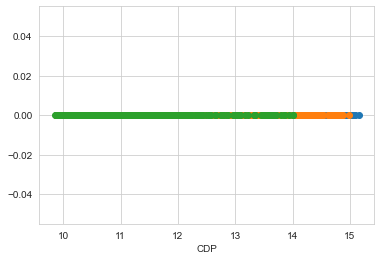

In [21]:
for feature in continuous_feature:
    print('\n'+feature+'\n')
    plt.plot(df1[feature],np.zeros_like(df1[feature]),'o')
    plt.plot(df2[feature],np.zeros_like(df2[feature]),'o')
    plt.plot(df3[feature],np.zeros_like(df3[feature]),'o')
    plt.xlabel(feature)
    plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


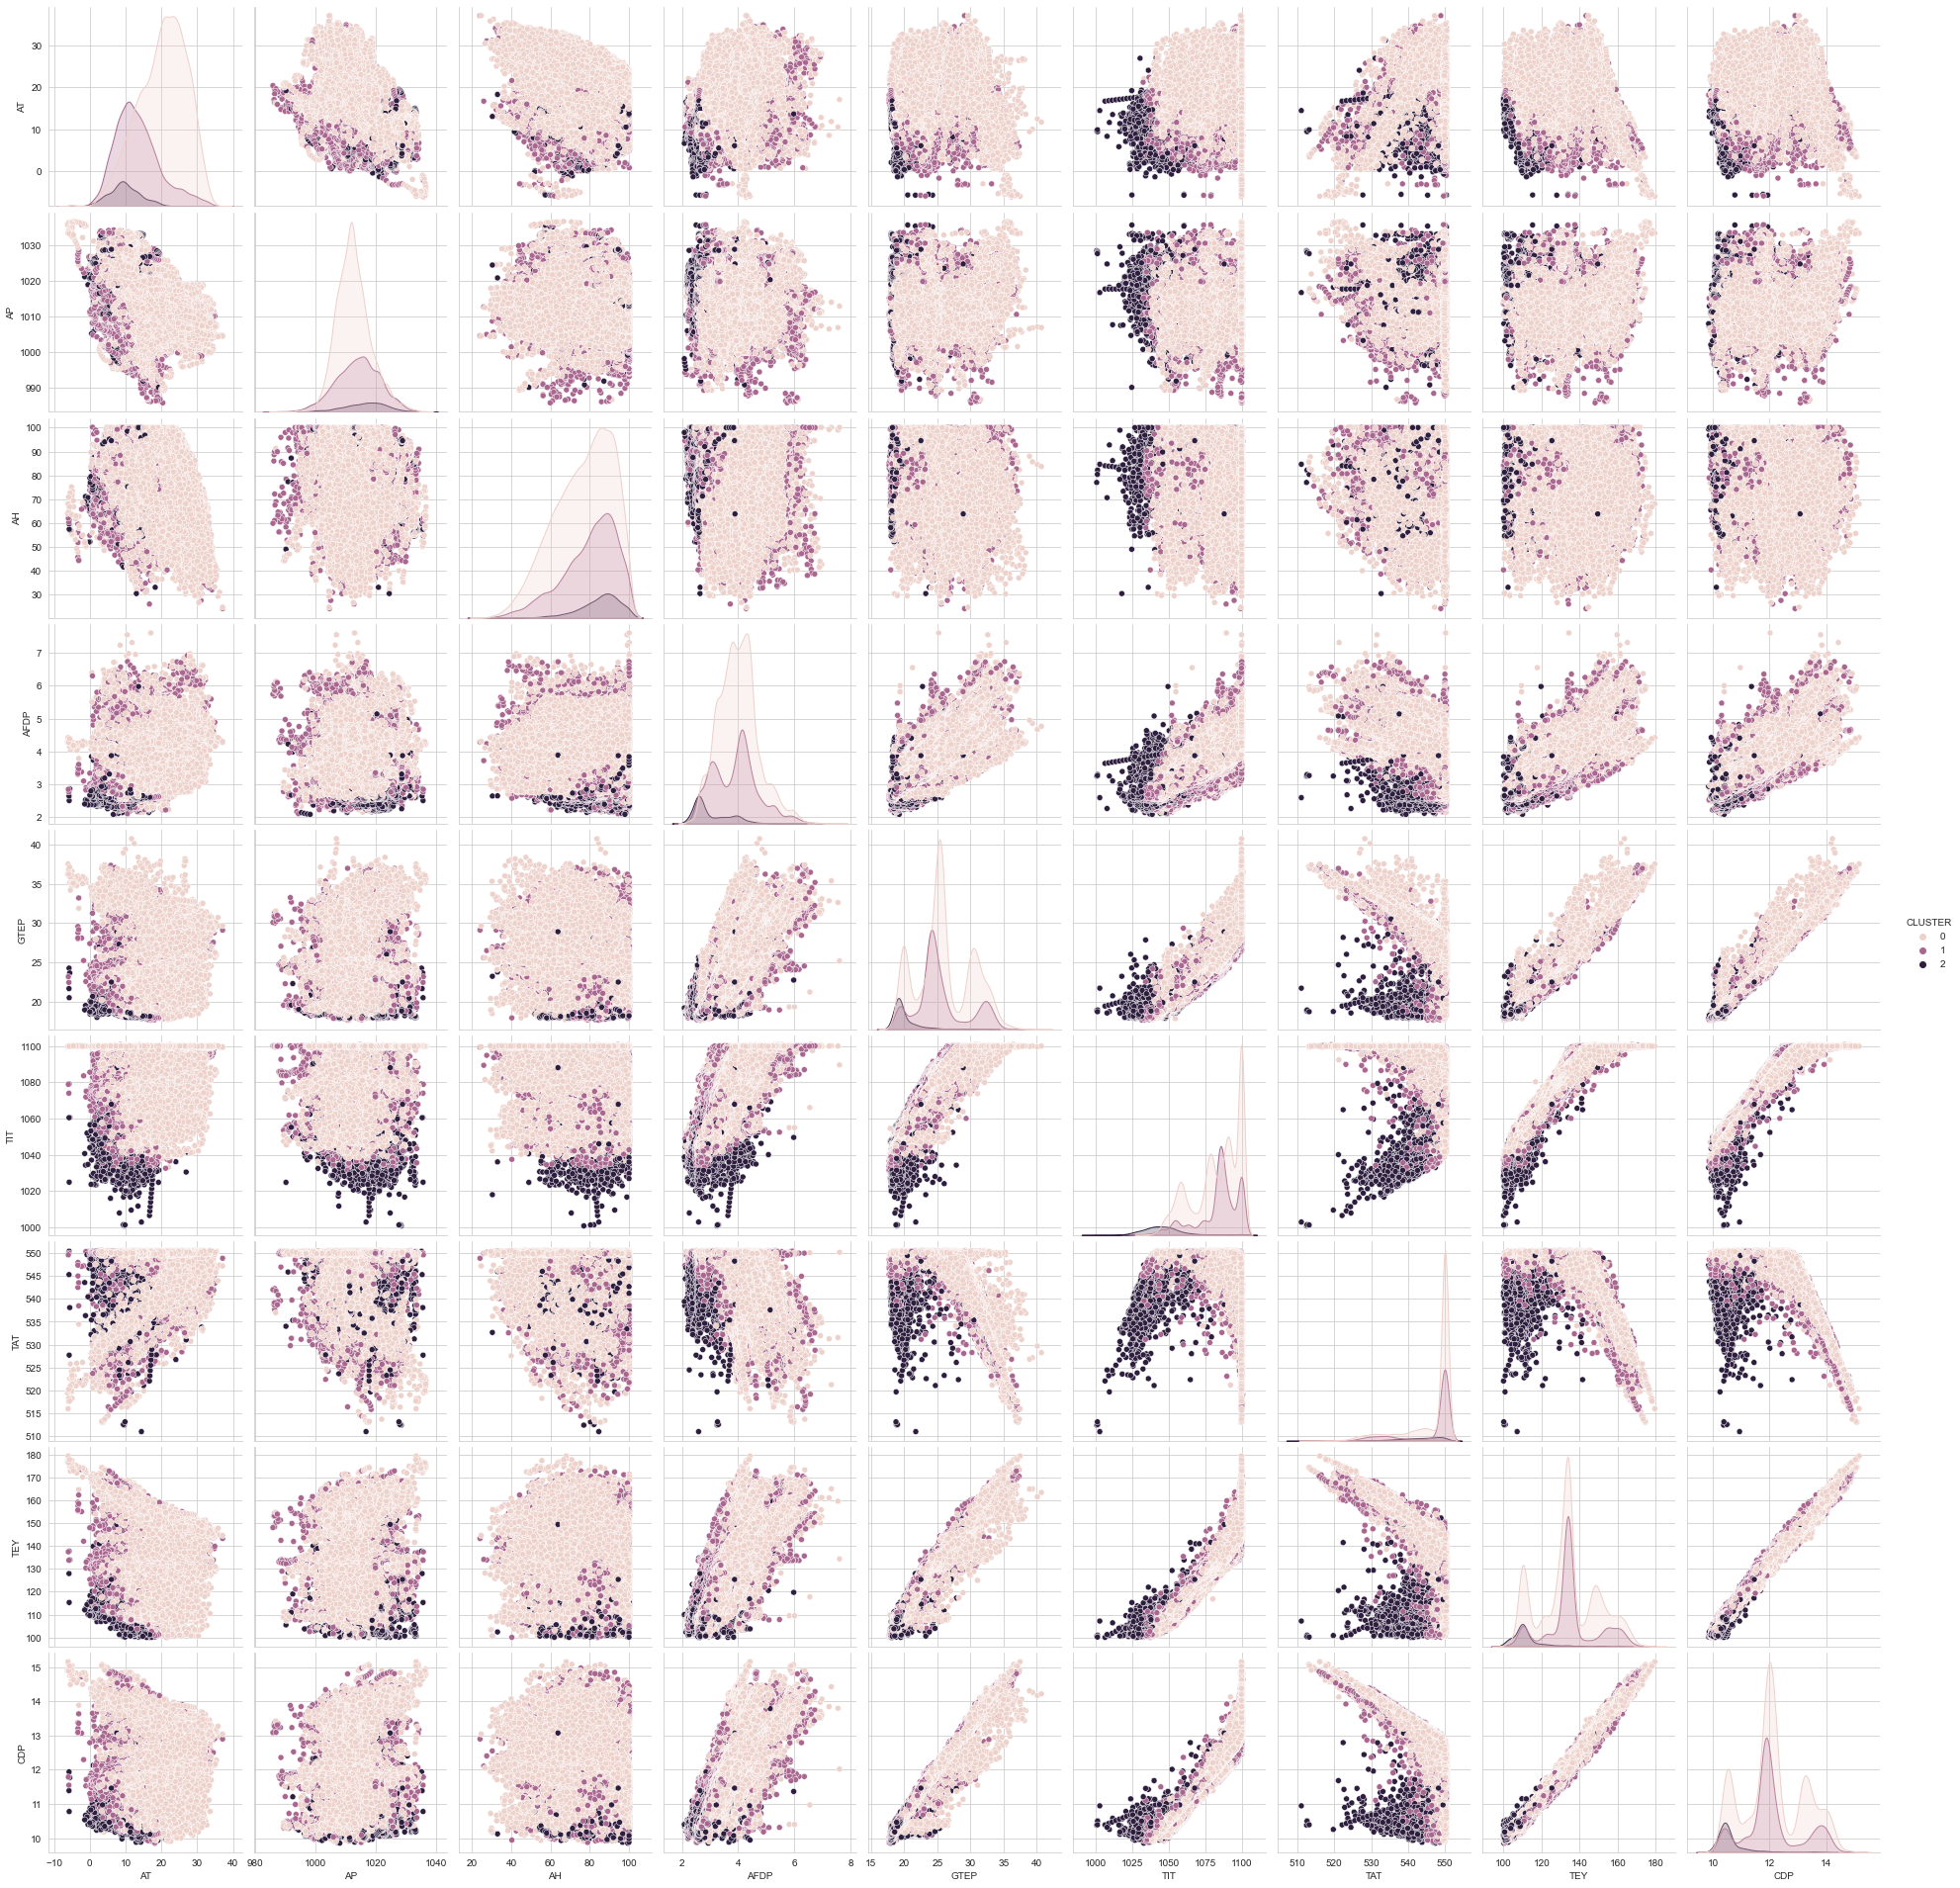

In [19]:
sns.pairplot(dataset,hue="CLUSTER",size=3)